# Polinomio de Taylor en $\mathbb{R}$

Click [aquí](https://youtu.be/BGxW9mIz1bo) para ver el video subido a YouTube

## Teoría

Si $f$ es una función y $P$ es el polinomio que la aproxima, $r(x)$ es el error que se comete al evaluar $P$ en cada valor de $x$ perteneciente al dominio, es decir:
$$\forall ~ x \in Domf: f(x) - P(x) = r(x)$$

El Polinomio de Taylor centrado en $c$ de grado $n$ se define:
$$P_n(x) = f(c) + f'(c)(x-c) + \frac{f''(c)}{2!}(x-c)^2 + \frac{f'''(c)}{3!}(x-c)^3 + \dotsb + \frac{f^{(n)}(c)}{n!}(x-c)^n$$

El siguiente código proporciona el polinomio de Taylor de grado $n$ centrado en un punto $c$:

**Nota 1**: Antes de usar el código, es necesario considerar que el polinomio no se encontrará o no será de utilidad si el dominio utilizado no es continuo.

**Nota 2**: Debido al punto flotante (redondeo) de las computadoras, es natural que a grados muy grandes el poliomio deje de ser eficiente.

$$$$

**Función creada a continuación**: `polinomio_de_taylor`

Esta función puede ser llamada de la siguiente manera:

```py
x_poli, y_poli = polinomio_de_taylor(f, n, c, x_variable, x)
```
recibe una función ```f``` a la cual queremos hallarle el polinomio de Taylor de orden ```n``` centrado en ```c```, considerando el dominio ```x_variable``` y el símbolo ```x``` para la variable, y devuelve una lista ```[x_poli, y_poli]``` con las coordenadas horizontales y verticales del polinomio de Taylor.

En esta función tenemos dos parámetros opcionales: ```graficos``` y ```prints```

*   ```graficos```: Igualar a "True" para que se haga un gráfico que permita visualizar el punto $(c, f(c))$, el polinomio de Taylor y la función exacta (True por defecto).
*   ```prints```: Igualar a "True" para que se imprima el polinomio de Taylor (True por defecto).

Polinomio de Taylor de grado 2: 0.5*(x - 5)**2*exp(5) + (1.0*x - 5.0)*exp(5) + 1.0*exp(5)



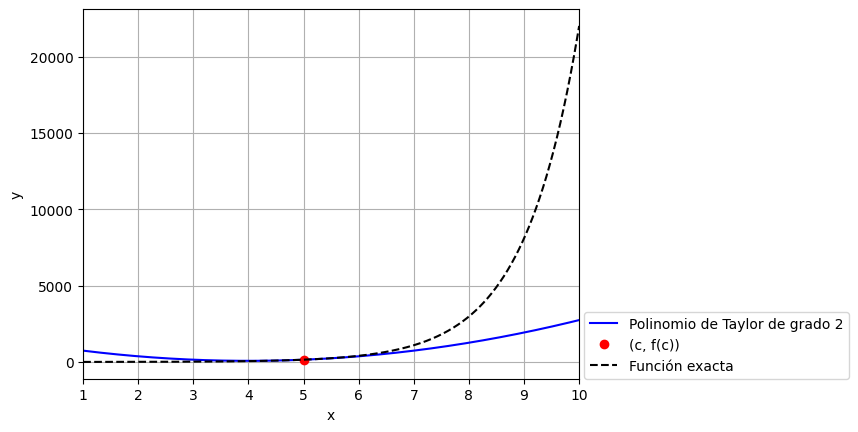

In [1]:
from sympy import Symbol, cos, sin, exp, log, sqrt, tan, atan, lambdify # Importo funciones (coseno, seno, exp, etc) para utilizar en el sympy
import matplotlib.pyplot as plt
import numpy as np

x = Symbol('x') # Defino a "x" como una variable que usaré en el Symbol

f = exp(x) # Defino la función a la cual le quiero averiguar el polinomio de Taylor
n = 2 # Grado del polinomio de Taylor
c = 5 # Punto c al cual está centrado el polinomio
x_variable = np.linspace(1, 10, 1000) # Dominio

###########################################
def polinomio_de_taylor(f, n, c, x_variable, x, graficos = True, prints = True):
    def fact(n): # Factorial de n
        r = 1
        for i in range(1, n + 1, 1):
            r = i*r
        return r
    
    derivadas = []
    for i in range(0, n + 1):                  
        derivada_i_esima = f.diff(x, i).subs(x, c) # Busca la derivada i-ésima de f con respecto a x y la evalúa en el punto c
        derivadas.append(derivada_i_esima) # Agrega eso a la lista de derivadas
    
    factor_restante = []
    for i in range(0, n + 1):                  
        F = ( 1 / fact(i) ) * (x - c)**i # Calcula lo demás
        factor_restante.append(F)                              
    
    polinomio_de_taylor_ = sum(np.multiply(derivadas, factor_restante)) # Multiplica el término i-ésimo de las derivadas con el término i-ésimo de "factor_restante", luego lo suma... obeniendo así el polinomio de Taylor
    
    #####
    if prints == True:
        print('Polinomio de Taylor de grado ' + str(n) + ':', str(polinomio_de_taylor_)), print()  #Imprime la función Taylor
    #####   
    polinomio_evaluado = lambdify(x, polinomio_de_taylor_, 'numpy')
    polinomio_evaluado = polinomio_evaluado(x_variable)
    
    if graficos == True:
        plt.plot(x_variable, polinomio_evaluado, color = 'blue', label = 'Polinomio de Taylor de grado ' + str(n)) # Grafico el polinomio de Taylor
        plt.plot(c, polinomio_de_taylor_.subs(x, c), 'o', color = 'red', label = '(c, f(c))') # Grafico el punto (c, P(c))
    
    #Grafico y comparo con la fórmula real:
    if graficos == True:
        f_real_evaluado = lambdify(x, f, 'numpy')
        f_real_evaluado = f_real_evaluado(x_variable)
        plt.plot(x_variable, f_real_evaluado, '--', color = 'black', label = 'Función exacta') # Grafico la función exacta
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(min(x_variable), max(x_variable)) # Límites de los ejes
        #plt.ylim(-1.5, 1.5)
        plt.legend(loc = (1.01, 0))
        plt.grid()
    return [x_variable, polinomio_evaluado]

#Ejemplo:
x_poli, y_poli = polinomio_de_taylor(f, n, c, x_variable, x)

## Animación

Este video muestra a modo de ejemplo cuánto mejora la aproximación por Taylor de grado $1$ hasta el $30$ centrado en el punto $c = 5$, aproximando la función exacta $f(x) = \frac{1 - cos(x)}{x^2}$

Para hacer esta animación utilicé el código de la teoría ligeramente modificado: quité la opción para crear gráficos en la propia función.

In [ ]:
from sympy import Symbol, cos, sin, exp, log, sqrt, tan, atan, lambdify # Importo funciones (coseno, seno, exp, etc) para utilizar en el sympy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc

rc('animation', html='html5')

x = Symbol('x') # Defino a "x" como una variable que usaré en el Symbol

f = (1 - cos(x))/x**2 # Defino la función a la cual le quiero averiguar el polinomio de Taylor
n, m = 1, 30 # Grado mínimo y máximo del polinomio de Taylor analizado
c = 5 # Punto c al cual está centrado el polinomio
x_variable = np.linspace(-20, 20, 1000) # Dominio

###########################################
def polinomio_de_taylor(f, n, c, x_variable, x, prints = True):
    def fact(n): # Factorial de n
        r = 1
        for i in range(1, n + 1, 1):
            r = i*r
        return r
    
    derivadas = []
    for i in range(0, n + 1):                  
        derivada_i_esima = f.diff(x, i).subs(x, c) # Busca la derivada i-ésima de f con respecto a x y la evalúa en el punto c
        derivadas.append(derivada_i_esima) # Agrega eso a la lista de derivadas
    
    factor_restante = []
    for i in range(0, n + 1):                  
        F = ( 1 / fact(i) ) * (x - c)**i # Calcula lo demás
        factor_restante.append(F)                              
    
    polinomio_de_taylor_ = sum(np.multiply(derivadas, factor_restante)) # Multiplica el término i-ésimo de las derivadas con el término i-ésimo de "factor_restante", luego lo suma... obeniendo así el polinomio de Taylor
    
    #####
    if prints == True:
        print('Polinomio de Taylor de grado ' + str(n) + ':', str(polinomio_de_taylor_)), print()  #Imprime la función Taylor
    #####
    polinomio_evaluado = lambdify(x, polinomio_de_taylor_, 'numpy')
    polinomio_evaluado = polinomio_evaluado(x_variable)
    return [x_variable, polinomio_evaluado]    

fig = plt.figure() # Creamos la figura donde se va a hacer la animación
ax = fig.gca() # Hace un par de ejes (gca = obten los ejes actuales de la figura)

def actualizar(k):
    ax.clear() # Borra lo que esté en los ejes, para que no se superpongan los gráficos                            
    x_poli, y_poli = polinomio_de_taylor(f, k, c, x_variable, x) # Grafico una vez, considerando el grado k del Polinomio de Taylor
    plt.plot(x_poli, y_poli, color = 'blue', label = 'Polinomio de T ')
    funcion_exacta = lambdify(x, f, 'numpy')
    funcion_exacta = funcion_exacta(x_variable)
    plt.plot(x_variable, funcion_exacta, '--', color = 'black', label = 'Función exacta')
    plt.scatter(c, f.subs(x, c), color = 'red', label = '(c, f(c))')
    plt.title('Polinomio de Taylor de grado ' + str(k))
    plt.xlim(x_variable[0], x_variable[-1])
    plt.ylim(-0.25, 0.7)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

inter = 1000
print(f'Animación a {round(1000/inter, 2)} fotogramas por segundo')

ani = animation.FuncAnimation(fig, actualizar, range(n, m+1), interval = inter) # (Agarra la figura llamada "fig", itera la función "actualizar", y saca "n" fotos definidas por el range. interval = X hace que cada foto esté sacada cada X milisegundos)
ani